In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [71]:
# Load data into a Pandas DataFrame
data = pd.read_csv("C:/Users/Koutilya's Nitro/OneDrive/Desktop/Gold/train_data.csv")
testt = pd.read_csv("C:/Users/Koutilya's Nitro/OneDrive/Desktop/Gold/test_data.csv")

In [72]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_C

In [73]:
# Check for missing values
print(data.isna().sum())


Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64


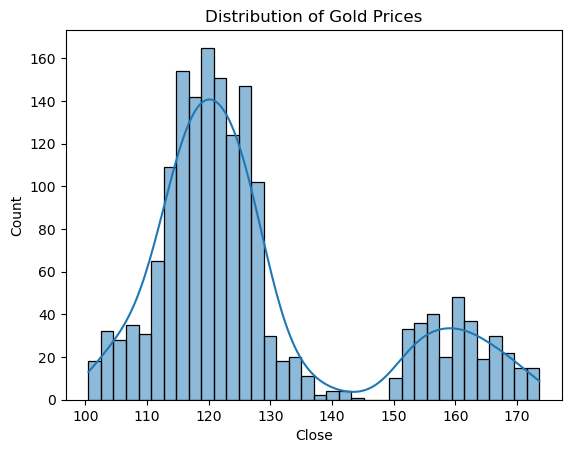

In [74]:
#  Visualize the distribution of the target variable
sns.histplot(data=data, x='Close', kde=True)
plt.title('Distribution of Gold Prices')
plt.show()

C:\Users\Koutilya's Nitro\AppData\Local\Temp\ipykernel_9564\2245593691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


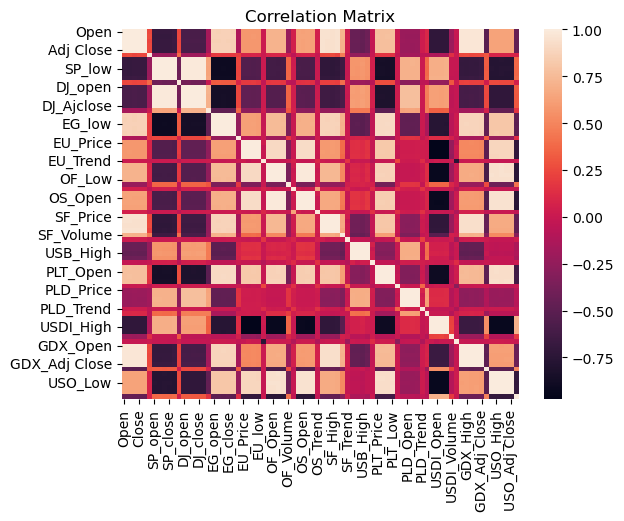

In [75]:
# Visualize the correlation between features and target variable
corr = data.corr()
sns.heatmap(corr, annot=False)
plt.title('Correlation Matrix')
plt.show()


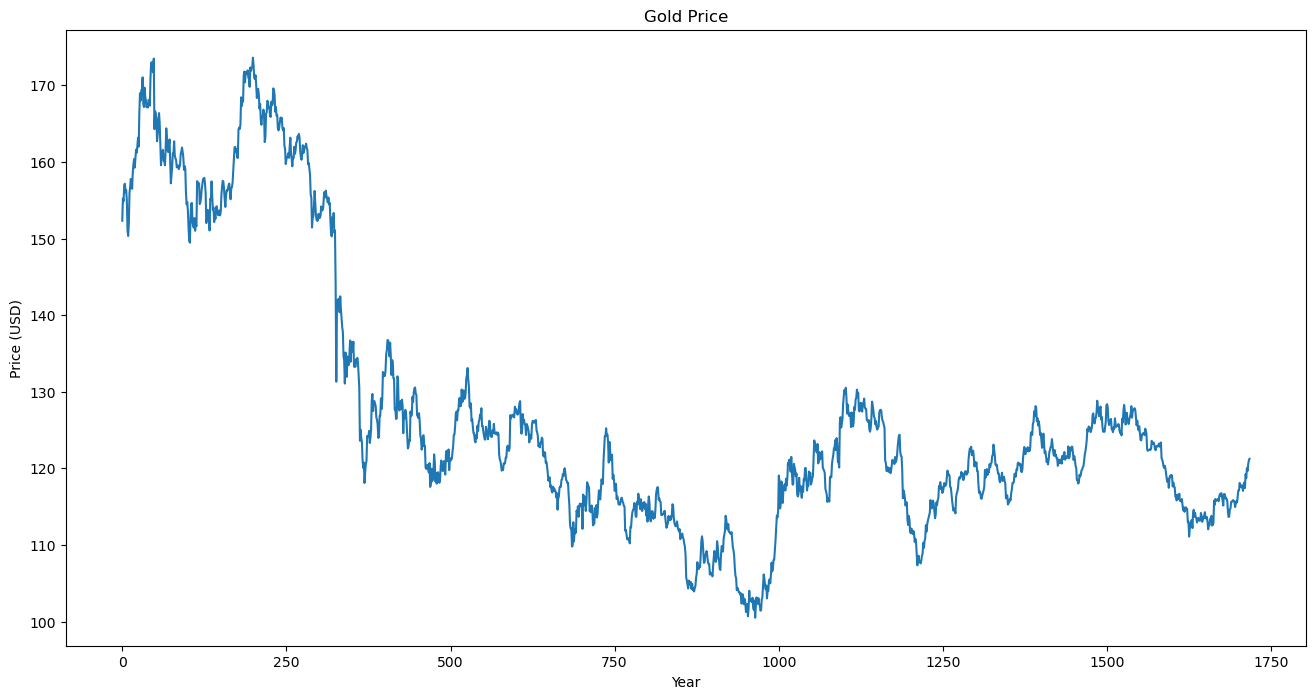

In [76]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.title('Gold Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.show()

In [77]:
# Feature engineering
data['date'] = pd.to_datetime(data['Date'])
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)
testt['date'] = pd.to_datetime(testt['Date'])
testt.set_index('date', inplace=True)
testt.drop('Date', axis=1, inplace=True)

In [78]:
# Feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.index = data.index

In [79]:
# Split data into training and testing sets
X = scaled_data.drop('Close', axis=1)
y = scaled_data['Close']
X_train = X[:-100]
y_train = y[:-100]
X_test = X[-100:]
y_test = y[-100:]

In [80]:
# Hyperparameter optimization
parameters = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [84]:
rf = RandomForestRegressor()
model = GridSearchCV(rf, parameters, cv=5)
model.fit(X_train, y_train)
print(model.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [85]:
# Train the model
model = RandomForestRegressor(n_estimators=model.best_params_['n_estimators'], 
                               max_depth=model.best_params_['max_depth'], 
                               min_samples_split=model.best_params_['min_samples_split'], 
                               min_samples_leaf=model.best_params_['min_samples_leaf'])
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5)

In [86]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [88]:
# Create a DataFrame with the predictions
predictions = pd.DataFrame({'Gold_Price': y_pred})

In [89]:
# Save the predictions to a CSV file
output = pd.DataFrame({'Date':testt.index[-100:], 'Price': y_pred})
output.to_csv("C:/Users/Koutilya's Nitro/OneDrive/Desktop/Gold/gold_price_predictions.csv", index=False)

In [90]:
# Print the predictions for the specified dates
print(output)

         Date     Price
0  2012-02-28  0.189093
1  2012-02-29  0.192767
2  2012-01-03  0.197142
3  2012-02-03  0.194590
4  2012-05-03  0.194159
..        ...       ...
95 2012-07-13  0.267184
96 2012-07-16  0.262003
97 2012-07-17  0.274389
98 2012-07-18  0.281300
99 2012-07-19  0.283820

[100 rows x 2 columns]
